In [1]:
#Hierarchical Clustering

In [33]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import plotly as py
import plotly.graph_objs as go



from sklearn import preprocessing 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 

In [34]:
from google.colab import files 
data=files.upload()

Saving Mall_Customers.csv to Mall_Customers (3).csv


In [35]:
#Import dataset
dataset = pd.read_csv("Mall_Customers.csv")
X = dataset.iloc[:, :].values

In [36]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

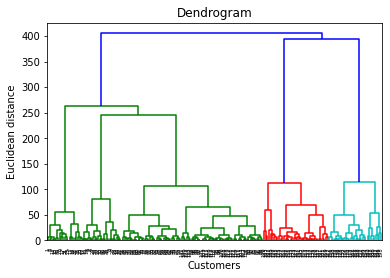

In [37]:
#Dendrogram to find optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distance")
plt.show()

In [38]:
#Train the model
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters = 3)
y_hc = clustering.fit_predict(X)

In [39]:
y_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

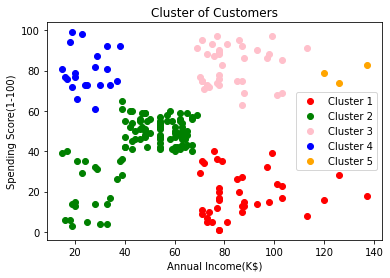

In [53]:
#Visualising the clusters
plt.scatter(X[y_hc == 0 , 0] ,X[y_hc == 0 , 1], c = 'red' , label = 'Cluster 1' )
plt.scatter(X[y_hc == 1 , 0] ,X[y_hc == 1 , 1], c = 'green' , label = 'Cluster 2' )
plt.scatter(X[y_hc == 2 , 0] ,X[y_hc == 2 , 1], c = 'pink' , label = 'Cluster 3' )
plt.scatter(X[y_hc == 3 , 0] ,X[y_hc == 3 , 1], c = 'blue' , label = 'Cluster 4' )
plt.scatter(X[y_hc == 4 , 0] ,X[y_hc == 4 , 1], c = 'orange' , label = 'Cluster 5' )
plt.title("Cluster of Customers")
plt.xlabel("Annual Income(K$)")
plt.ylabel("Spending Score(1-100)")
plt.legend()
plt.show()

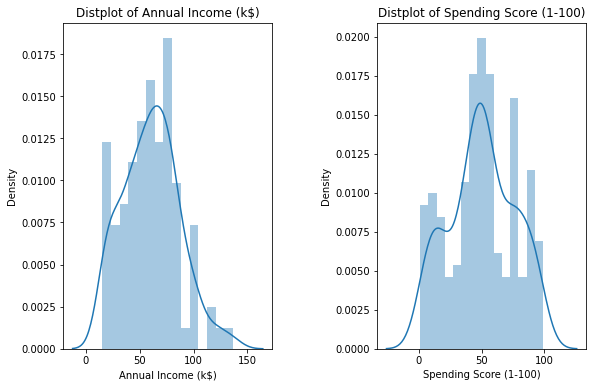

In [54]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(dataset[x],bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

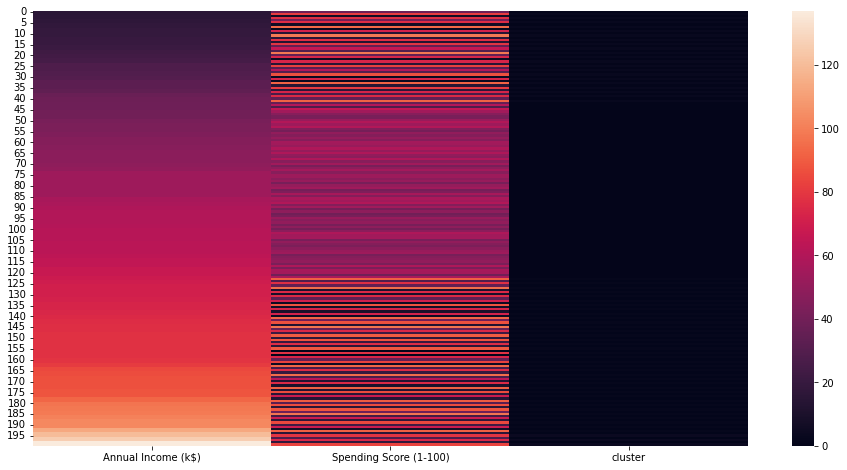

In [55]:
#Heatmap A heat map is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions. 
#The variation in color may be by hue or intensity, giving obvious visual cues to the reader about how the phenomenon is clustered or varies over space.
plt.figure(1, figsize = (16 ,8))
sns.heatmap(dataset)
plt.show()

In [45]:
#Agglomerative Clustering
#This is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='average')

y_hc = hc.fit_predict(dataset)
y_hc

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4, 0, 4,
       0, 4])

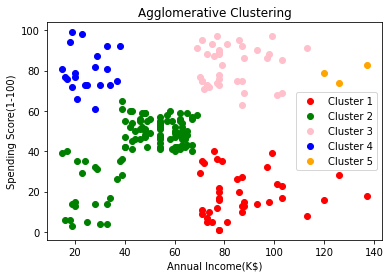

In [52]:
plt.scatter(X[y_hc == 0 , 0] ,X[y_hc == 0 , 1], c = 'red' , label = 'Cluster 1' )
plt.scatter(X[y_hc == 1 , 0] ,X[y_hc == 1 , 1], c = 'green' , label = 'Cluster 2' )
plt.scatter(X[y_hc == 2 , 0] ,X[y_hc == 2 , 1], c = 'pink' , label = 'Cluster 3' )
plt.scatter(X[y_hc == 3 , 0] ,X[y_hc == 3 , 1], c = 'blue' , label = 'Cluster 4' )
plt.scatter(X[y_hc == 4 , 0] ,X[y_hc == 4 , 1], c = 'orange' , label = 'Cluster 5' )
plt.title("Agglomerative Clustering")
plt.xlabel("Annual Income(K$)")
plt.ylabel("Spending Score(1-100)")
plt.legend()
plt.show()